In [1]:
from importlib import reload
from cpclasses import *
import torch



In [2]:
def target_function(x):

    return 5*torch.exp(-x**2/10) * x**2 + torch.randn_like(x) * 0.5

#Training data
xs_train = -20 * torch.rand(80, 1) + 10
ys_train = target_function(xs_train)

#Validation data
xs_validation = -20 * torch.rand(100, 1) + 10
ys_validation = target_function(xs_validation)

#Test data
xs_test = -20 * torch.rand(10, 1) + 10
ys_test = target_function(xs_test)


In [3]:
training_data = CustomDataset(xs_train, ys_train)
validation_data = CustomDataset(xs_validation, ys_validation)
test_data = CustomDataset(xs_test, ys_test)




In [4]:
training_loader = DataLoader(training_data, batch_size=4, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=5, shuffle=True)
test_loader = DataLoader(test_data, batch_size=5, shuffle=True)

loaders = {'train': training_loader, 'val': validation_loader, 'test': test_loader}

for data in validation_loader:
    print(data[0])
    print(data[1])
    

tensor([[-3.4341],
        [-3.1343],
        [-6.5721],
        [-3.4961],
        [ 4.5032]])
tensor([[18.1185],
        [17.7171],
        [ 2.0828],
        [18.1937],
        [12.9310]])
tensor([[-7.3306],
        [-6.5951],
        [ 4.7863],
        [-3.6998],
        [ 8.9524]])
tensor([[ 1.3733],
        [ 3.0015],
        [11.3938],
        [17.4377],
        [-0.3164]])
tensor([[ 0.3966],
        [-8.6446],
        [-1.0684],
        [-2.2180],
        [-1.5955]])
tensor([[ 0.6359],
        [ 1.4555],
        [ 5.0143],
        [14.5497],
        [ 9.7089]])
tensor([[ 3.5193],
        [-5.2868],
        [-4.8366],
        [ 4.5108],
        [ 5.6103]])
tensor([[18.2647],
        [ 8.9235],
        [11.3607],
        [12.7434],
        [ 7.2832]])
tensor([[ 3.2881],
        [-5.3809],
        [ 6.5988],
        [ 5.5372],
        [ 7.0166]])
tensor([[18.1106],
        [ 7.6261],
        [ 2.3049],
        [ 7.4446],
        [ 2.4338]])
tensor([[ 2.4167],
        [-0.7780],
  

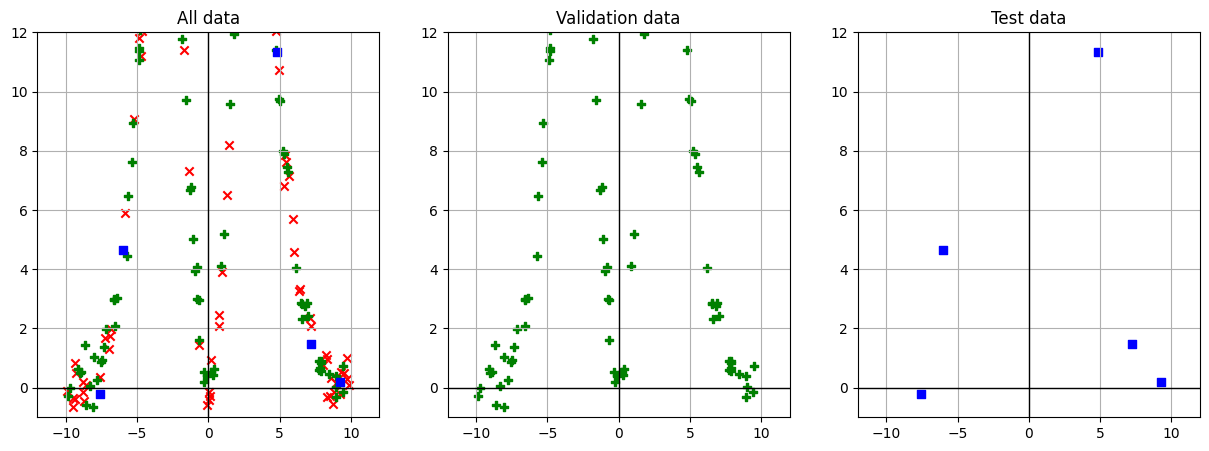

In [5]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for data in training_loader:
    axs[0].scatter(data[0], data[1], marker = 'x', label='train', color='red')
for data in validation_loader:
    axs[0].scatter(data[0], data[1], marker = 'P', label='val', color='green')
    axs[1].scatter(data[0], data[1], marker = 'P', label='val', color='green')
for data in test_loader:
    axs[0].scatter(data[0], data[1], marker = 's', label='test', color='blue')
    axs[2].scatter(data[0], data[1], marker = 's', label='test', color='blue')

axs[0].set_title('All data')
axs[1].set_title('Validation data')
axs[2].set_title('Test data')

for ax in axs:
    ax.grid()
    ax.set(xlim = (-12,12), ylim = (-1,12))
    coordinate_axes(ax)

In [6]:
earlyStopping = EarlyStopping(patience=1000)

CLN = CustomLinearNetwork(n_hidden=2, n_neurons=8, activation='tanh')


In [7]:
CLN.fit_loader(training_loader, validation_loader, epochs=10000, patience=10000)

c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 
 Training loss: 61.26918029785156 
 Validation loss: 43.942693901062015
Epoch 250 
 Training loss: 44.27859230041504 
 Validation loss: 41.805218887329104
Epoch 500 
 Training loss: 44.4165120601654 
 Validation loss: 40.50606870651245
Epoch 750 
 Training loss: 44.23937797546387 
 Validation loss: 41.91231279373169
Epoch 1000 
 Training loss: 45.484377074241635 
 Validation loss: 41.503495121002196
Epoch 1250 
 Training loss: 44.64298129081726 
 Validation loss: 42.35920286178589
Epoch 1500 
 Training loss: 44.835879230499266 
 Validation loss: 42.913555479049684
Epoch 1750 
 Training loss: 45.35287303924561 
 Validation loss: 42.8401556968689
Epoch 2000 
 Training loss: 45.075467109680176 
 Validation loss: 42.896323680877686
Epoch 2250 
 Training loss: 44.75693521499634 
 Validation loss: 42.16225051879883
Epoch 2500 
 Training loss: 44.869913005828856 
 Validation loss: 42.352302932739256
Epoch 2750 
 Training loss: 44.92687730789184 
 Validation loss: 42.44656567573547
Ep

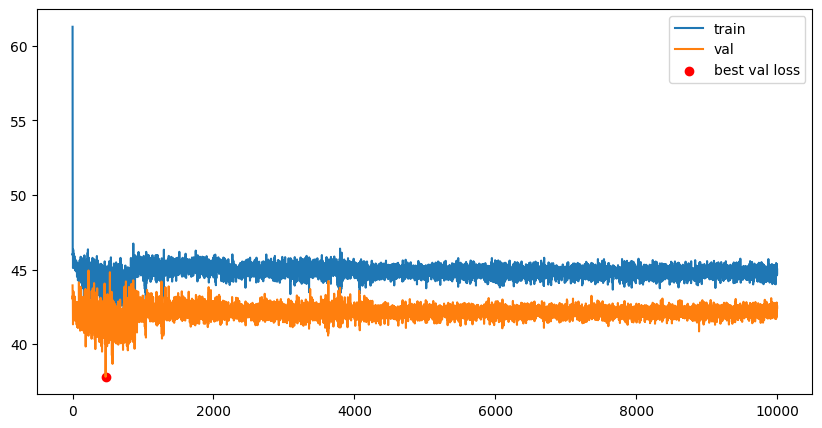

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(CLN.train_loss, label='train')
ax.plot(CLN.val_loss, label='val')
best_idx = np.argmin(CLN.val_loss)
ax.scatter(best_idx, CLN.val_loss[best_idx], color='red', label='best val loss')

ax.legend()

Text(0.5, 1.0, 'Model prediction on training data')

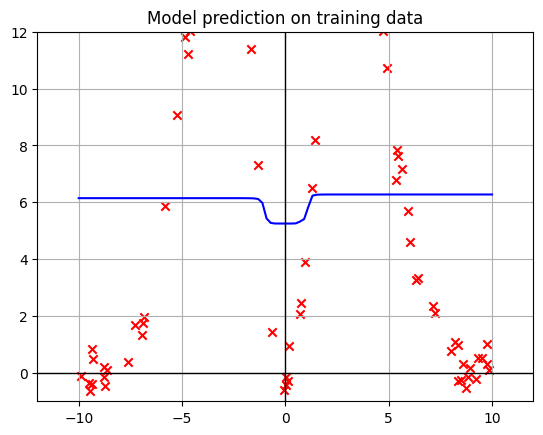

In [9]:
fig, ax = plt.subplots()

for data in training_loader:
    ax.scatter(data[0], data[1], marker = 'x', label='train', color='red')



xs = torch.linspace(-10, 10,100)

with torch.no_grad():
    ax.plot(xs, CLN(xs), label='model', color='blue')

ax.grid()
ax.set(xlim = (-12,12), ylim = (-1,12))
coordinate_axes(ax)
ax.set_title('Model prediction on training data')


